In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from typing import Dict, List, Tuple

In [2]:
TRACK_DIR = "./data/track_0_10000.csv"
ARTIST_DIR= "./data/artist_0_5059.csv"

### LOAD DATA

In [11]:
df_track = pd.read_csv(TRACK_DIR, index_col=0)
df_artist= pd.read_csv(ARTIST_DIR, index_col=0)

In [12]:
df_track.head()

,artists,available_markets,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,1ifC4znYCvmMSJ0rght5JS,NaN,False,0,0.554,0.318,3,-13.288,0,0.0392,...,0.1230,0.0565,130.110,audio_features,57pTcQBErlQjfe2kfzLffr,spotify:track:57pTcQBErlQjfe2kfzLffr,https://api.spotify.com/v1/tracks/57pTcQBErlQj...,https://api.spotify.com/v1/audio-analysis/57pT...,233240,4
1,7egNqIGRldMzifHoh8pib6,"AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CH,CL,C...",False,48,0.515,0.490,2,-8.565,1,0.0284,...,0.0875,0.4950,109.290,audio_features,3CFx8SBSwY8Q1IplDTQ6kB,spotify:track:3CFx8SBSwY8Q1IplDTQ6kB,https://api.spotify.com/v1/tracks/3CFx8SBSwY8Q...,https://api.spotify.com/v1/audio-analysis/3CFx...,166867,4
2,0QmOR0TqxMPtZxtaIJ5klY,"AD,AL,AR,AT,AU,BA,BE,BG,BO,BR,BY,CA,CH,CL,CO,C...",False,46,0.716,0.829,1,-5.370,0,0.0615,...,0.0705,0.7050,115.033,audio_features,6YWFr8BHQrRL4b7RwuqS36,spotify:track:6YWFr8BHQrRL4b7RwuqS36,https://api.spotify.com/v1/tracks/6YWFr8BHQrRL...,https://api.spotify.com/v1/audio-analysis/6YWF...,180586,4
3,3ZXXJ9nO1Dn9B0AJ25eAQY,"AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CA,CH,C...",False,38,0.500,0.638,9,-7.291,1,0.0315,...,0.1150,0.3430,167.921,audio_features,4qJptAjwx2y7nZCOeXsSC9,spotify:track:4qJptAjwx2y7nZCOeXsSC9,https://api.spotify.com/v1/tracks/4qJptAjwx2y7...,https://api.spotify.com/v1/audio-analysis/4qJp...,249493,4
4,"3kklzjWziqW7RX5jQjsRnb,4bOG1sx3QHFbOUVLNmMpPe",NaN,False,0,0.533,0.786,8,-4.278,1,0.2210,...,0.2400,0.4780,69.844,audio_features,6vR3DSb5oiUlEXqymcQR5n,spotify:track:6vR3DSb5oiUlEXqymcQR5n,https://api.spotify.com/v1/tracks/6vR3DSb5oiUl...,https://api.spotify.com/v1/audio-analysis/6vR3...,262000,3


In [13]:
df_artist.head()

,followers,genres,id,name,popularity
0,117379,"['indie anthem-folk', 'indie cafe pop', 'indie...",1ifC4znYCvmMSJ0rght5JS,Haux,63
1,71415,"['adult standards', 'brill building pop', 'eas...",7egNqIGRldMzifHoh8pib6,Al Martino,52
2,50132,"['eurovision', 'israeli pop']",0QmOR0TqxMPtZxtaIJ5klY,Nadav Guedj,38
3,33002,"['indie rock', 'stomp and holler']",3ZXXJ9nO1Dn9B0AJ25eAQY,Hamilton Leithauser,51
4,680303,"['k-pop', 'korean pop']",6OwKE9Ez6ALxpTaKcT5ayv,AKMU,65


In [14]:
print("Tracks dataframe shape:  ", df_track.shape)
print("Artists dataframe shape: ", df_artist.shape)

Tracks dataframe shape:   (10000, 22)
Artists dataframe shape:  (5059, 5)


In [15]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   artists            10000 non-null  object 
 1   available_markets  7723 non-null   object 
 2   explicit           10000 non-null  bool   
 3   popularity         10000 non-null  int64  
 4   danceability       10000 non-null  float64
 5   energy             10000 non-null  float64
 6   key                10000 non-null  int64  
 7   loudness           10000 non-null  float64
 8   mode               10000 non-null  int64  
 9   speechiness        10000 non-null  float64
 10  acousticness       10000 non-null  float64
 11  instrumentalness   10000 non-null  float64
 12  liveness           10000 non-null  float64
 13  valence            10000 non-null  float64
 14  tempo              10000 non-null  float64
 15  type               10000 non-null  object 
 16  id                 1000

In [16]:
df_artist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5059 entries, 0 to 5058
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   followers   5059 non-null   int64 
 1   genres      5059 non-null   object
 2   id          5059 non-null   object
 3   name        5059 non-null   object
 4   popularity  5059 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 237.1+ KB


### Giải thích các cột trong df_track
|STT|Tên cột|Ý nghĩa|
|---|---|---|
|0  |artists |ID Spotify của các nghệ sĩ trình bày ca khúc, cách nhau bởi dấu "," |
|1  |available_markets   |Các khu vực trên thế giới có thể nghe bài hát, mỗi nước là một code 2 chữ in hoa, cách nhau bởi dấu ","|
|2  |explicit            |True nếu bài hát chứa nội dung không phù hợp cho mọi đối tượng, ngược lại là False|
|3  |popularity          |Độ yêu thích, từ 0-100|
|4  |danceability        |Mức độ phù hợp của bài hát để nhảy, đo từ 0-1|
|5  |energy              |Mức độ sôi động của bài hát, đo từ 0-1|
|6  |key                 |Tông của bài hát, nếu không xác định, nhận giá trị là -1|
|7  |loudness            |Độ lớn db của bài hát từ -60 - 0|
|8  |mode                |1 cho biết bài hát viết theo "major", 0 là "minor"|
|9  |speechiness         |Từ 0-1, 0 có nghĩa bài hát không có lời, 1 có nghĩa bài hát có phần lời phức tạp|
|10 |acousticness        |Từ 0-1, khả năng bài hát có thể trình bày dưới dạng acoustic|
|11 |instrumentalness    |Từ 0-1, càng nhỏ cho thấy bài hát có phần lời ít|
|12 |liveness            |Từ 0-1, mức độ phù hợp để trình diễn trực tiếp|
|13 |valence             |Từ 0-1, mức độ tích cực của nội dung bài hát|
|14 |tempo               |Từ 0-1, độ nhanh của nhạc nền (số beat trên 1 phút)|
|15 |type            |Kiểu dữ liệu trả về khi gọi api, tất cả đều là "audio features"|
|16 |uri             |URI của bài hát|
|17 |track_href      |Link tới bài hát|
|18 |analysis_url    |Link tới phần đặc trưng âm thanh của bài hát|
|19 |duration_ms     |Độ dài bài hát|
|20 |time_signature  |Số beat của 1 câu trong bài hát|

### Giải thích các cột trong df_artist
|STT|Tên cột|Ý nghĩa|
|---|---|---|
|0  |followers |Số người theo dõi|
|1  |genres   |Thể loại theo đuổi, có dạng một list các str|
|2  |name            |Tên nghệ sĩ|
|3  |popularity          |Độ yêu thích, từ 0-100|

### Chia dữ liệu thành train set, dev set và test set

In [22]:
from sklearn.model_selection import train_test_split

In [33]:
df_train, df_test = train_test_split(df_track, random_state=0, test_size=0.2)
df_train, df_dev = train_test_split(df_train, random_state=0, test_size=1000)

In [38]:
df_train.shape, df_dev.shape, df_test.shape

print("Train:", df_train.shape)
print("Dev:  ", df_dev.shape)
print("Test: ", df_test.shape)

Train: (7000, 22)
Dev:   (1000, 22)
Test:  (2000, 22)


### Phân tích về các khu vực phát hành

Câu hỏi: việc có hoặc không phát hành tại mỗi khu vực có ảnh hưởng như thế nào đến độ yêu thích của bài hát.

Ích lợi: cho biết nên ưu tiên phát hành ở thị trường nào.

In [17]:
df_01 = df_track[["available_markets", "popularity"]].dropna()
df_01["available_markets"] = df_01["available_markets"].apply(lambda x : x.split(","))
df_01

,available_markets,popularity
1,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",48
2,"[AD, AL, AR, AT, AU, BA, BE, BG, BO, BR, BY, C...",46
3,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",38
5,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",68
6,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",43
...,...,...
9993,"[AD, AE, AL, AR, AT, BA, BE, BG, BH, BO, BR, B...",47
9994,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",61
9995,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",34
9996,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",71


In [18]:
all_areas = df_01["available_markets"].explode().unique()

for a in all_areas:
    df_01[f"in_{a}"] = df_01["available_markets"].apply(lambda x : a in x)

cor    = df_01.corrwith(df_01.popularity).drop("popularity")
mean   = df_01.mean().drop("popularity")

In [19]:
result = pd.concat({"correlate": cor, "percent": mean}, axis=1)
result.nlargest(10, columns=["correlate"])

,correlate,percent
in_ME,0.222319,0.858345
in_RS,0.214936,0.846433
in_XK,0.214936,0.846433
in_US,0.097766,0.907808
in_JP,0.096022,0.864301
in_MX,0.091621,0.913764
in_SG,0.081496,0.910398
in_PE,0.076298,0.910656
in_PA,0.075948,0.911692
in_SV,0.075779,0.911563


In [20]:
result.describe()

,correlate,percent
count,92.000000,92.000000
mean,0.067032,0.904227
std,0.030852,0.013264
min,0.015759,0.846433
25%,0.054245,0.902337
50%,0.065204,0.908714
75%,0.071664,0.911433
max,0.222319,0.915577


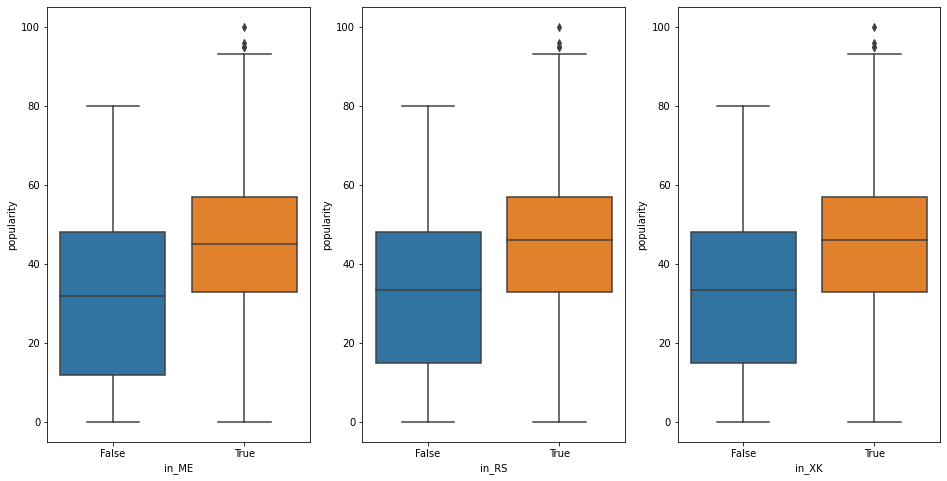

In [21]:
plt.figure(figsize=(16, 8))
ax = plt.subplot(1, 3, 1)
sns.boxplot(df_01["in_ME"], df_01["popularity"], ax=ax)
ax = plt.subplot(1, 3, 2)
sns.boxplot(df_01["in_RS"], df_01["popularity"], ax=ax)
ax = plt.subplot(1, 3, 3)
sns.boxplot(df_01["in_XK"], df_01["popularity"], ax=ax);

Ta thấy ở các khu đã xét, các bài hát được phát hành tại những nơi này có độ yêu thích trung bình lớn hơn so với trung bình những bài không được phát hành ở đây.